## 🧩 Notebook 08: Linear Algebra & Statistics using NumPy & SciPy

In [1]:
# Setup and Imports

import numpy as np
import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.linear_algebra_utils import (
    compute_eigen,
    compute_svd,
    solve_least_squares,
    compute_inverse,
    compute_determinant,
    matrix_summary_df
)
from utils.viz_utils import (plot_eigenvectors,
                             plot_singular_values,
                             plot_least_squares_fit,
                             plot_least_squares_residuals,
                             save_and_show_plot)

# Constants
EXPORT_PLOTS = Path("../exports/plots/08_linear_algebra")
EXPORT_TABLES = Path("../exports/tables/08_linear_algebra")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)


## 🔹 Step 1: Define a Symmetric Matrix for Eigen Analysis

In [2]:
A_eigen = np.array([[6, 2], [2, 3]])
eigen_result = compute_eigen(A_eigen)
print("Eigenvalues:", eigen_result["eigenvalues"])
print("Eigenvectors:\n", eigen_result["eigenvectors"])

Eigenvalues: [7. 2.]
Eigenvectors:
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [3]:
# Exporting the eigenvalues and eigenvectors
pd.DataFrame({"Eigenvalues": eigen_result["eigenvalues"]}).to_csv(EXPORT_TABLES / "step1_eigenvalues.csv", index=False)
pd.DataFrame(eigen_result["eigenvectors"].round(4)).to_csv(EXPORT_TABLES / "step1_eigenvectors.csv", index=False)

In [4]:
# Verify A*v ≈ λ*v
verification = A_eigen @ eigen_result["eigenvectors"] - \
               eigen_result["eigenvectors"] @ np.diag(eigen_result["eigenvalues"])

pd.DataFrame(verification).to_csv(EXPORT_TABLES / "step1_eigen_verification.csv", index=False)

## 🔹 Step 2: Apply SVD on a General Matrix

In [5]:
M = np.array([[3, 1, 1], [-1, 3, 1]])
svd_result = compute_svd(M)

print("U:\n", svd_result["U"])
print("Singular Values:", svd_result["S"])
print("Vt:\n", svd_result["Vt"])

U:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Singular Values: [3.46410162 3.16227766]
Vt:
 [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-8.94427191e-01  4.47213595e-01  5.27355937e-16]
 [-1.82574186e-01 -3.65148372e-01  9.12870929e-01]]


In [6]:
# Export SVD components
pd.DataFrame(svd_result["U"]).to_csv(EXPORT_TABLES / "step2_svd_U.csv", index=False)
pd.DataFrame(svd_result["S"]).to_csv(EXPORT_TABLES / "step2_svd_S.csv", index=False)
pd.DataFrame(svd_result["Vt"]).to_csv(EXPORT_TABLES / "step2_svd_Vt.csv", index=False)

In [7]:
# Covariance matrix check
cov_matrix = np.cov(M, rowvar=False)
pd.DataFrame(cov_matrix).to_csv(EXPORT_TABLES / "step2_covariance_matrix.csv", index=False)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 8. -4.  0.]
 [-4.  2.  0.]
 [ 0.  0.  0.]]


In [8]:
# Build full Sigma with correct shape
Sigma_full = np.zeros((svd_result["U"].shape[0], svd_result["Vt"].shape[0]))
np.fill_diagonal(Sigma_full, svd_result["S"])

# Reconstruct
reconstruction = svd_result["U"] @ Sigma_full @ svd_result["Vt"]
diff = M - reconstruction
pd.DataFrame(diff.round(4)).to_csv(EXPORT_TABLES / "step2_svd_reconstruction_diff.csv", index=False)
diff

array([[ 8.88178420e-16,  2.22044605e-16,  3.33066907e-16],
       [-8.88178420e-16,  8.88178420e-16,  0.00000000e+00]])

## 🔹 Step 3: Solve Least Squares Problem

In [9]:
# Solve Least Squares Problem
A_lstsq = np.array([[1, 1], [1, 2], [1, 3]])
b = np.array([1, 2, 2.5])

lstsq_result = solve_least_squares(A_lstsq, b)
print("Solution:", lstsq_result["solution"])
print("Residuals:", lstsq_result["residuals"])

Solution: [0.33333333 0.75      ]
Residuals: [0.04166667]


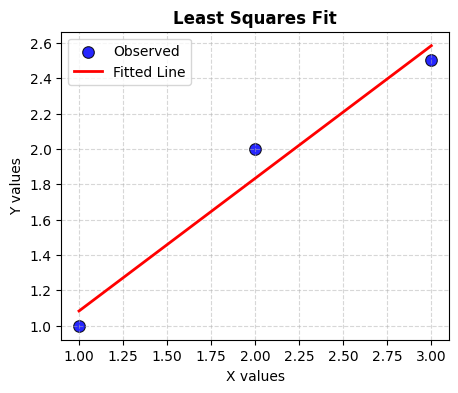

In [10]:
# Solution plotting
predicted_b = A_lstsq @ lstsq_result["solution"]

fig_ls = plot_least_squares_fit(
    x_values=[1, 2, 3],
    observed=b,
    predicted=predicted_b
)
save_and_show_plot(fig_ls, EXPORT_PLOTS / "step3_least_squares_fit.png")

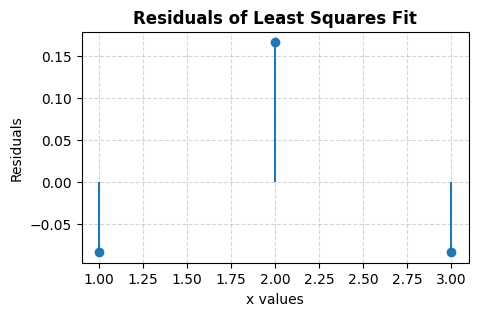

In [11]:
# Residual plotting
residuals = b - predicted_b
fig_res = plot_least_squares_residuals(
    x_values=[1, 2, 3],
    residuals=residuals
)
save_and_show_plot(fig_res, EXPORT_PLOTS / "step3_least_squares_residuals.png")

In [12]:
# Verify Ax ≈ b
predicted_b = A_lstsq @ lstsq_result["solution"]
verification_df = pd.DataFrame({"Observed": b, "Predicted": predicted_b})
verification_df.to_csv(EXPORT_TABLES / "step3_least_squares_verification.csv", index=False)
display(verification_df)

,Observed,Predicted
0,1.0,1.083333
1,2.0,1.833333
2,2.5,2.583333


In [13]:
# Residual Norm in Least Squares
residual_norm = np.linalg.norm(residuals)
pd.DataFrame({"Residual_Norm": [residual_norm]}).to_csv(EXPORT_TABLES / "step3_residual_norm.csv", index=False)

## 🔹 Step 4: Matrix Diagnostics

In [14]:
matrix = np.array([[4, 7], [2, 6]])
inverse = compute_inverse(matrix)
print("Inverse of matrix:\n", inverse)

# Save inverse matrix
pd.DataFrame(inverse).to_csv(EXPORT_TABLES / "step4_inverse_matrix.csv", index=False)

Inverse of matrix:
 [[ 0.6 -0.7]
 [-0.2  0.4]]


In [15]:
# Adding a Condition Number Check (Numerical Stability)
condition_number = np.linalg.cond(matrix)
print("Condition Number:", round(condition_number, 4))
pd.DataFrame({"Condition_Number": [condition_number]}).to_csv(EXPORT_TABLES / "step4_condition_number.csv", index=False)


Condition Number: 10.4039


In [16]:
# Rank of the matrix
rank = np.linalg.matrix_rank(matrix)
print("Matrix Rank:", rank)
pd.DataFrame({"Rank": [rank]}).to_csv(EXPORT_TABLES / "step4_matrix_rank.csv", index=False)

Matrix Rank: 2


In [17]:
# Trace of the matrix
trace = np.trace(matrix)
print("Matrix Trace:", trace)
pd.DataFrame({"Trace": [trace]}).to_csv(EXPORT_TABLES / "step4_matrix_trace.csv", index=False)

Matrix Trace: 10


In [18]:
# Norm of the matrix
norm_value = np.linalg.norm(matrix)
pd.DataFrame({"Matrix_Norm": [norm_value]}).to_csv(EXPORT_TABLES / "step4_matrix_norm.csv", index=False)

## 🔹 Step 5: Determinant Calculation

In [19]:
# Determinant Calculation
det_A = compute_determinant(matrix)
print("Determinant of matrix:", round(det_A, 4))

pd.DataFrame({"Determinant": [det_A]}).to_csv(EXPORT_TABLES / "step5_determinant.csv", index=False)

Determinant of matrix: 10.0


## 🔹 Step 6: Matrix Summary

In [20]:
## 🔹 Step 6: Matrix Summary
summary_df = matrix_summary_df(matrix)
summary_df.to_csv(EXPORT_TABLES / "step6_matrix_summary.csv", index=False)
display(summary_df)

,Shape,Rank,Determinant,Condition Number
0,"(2, 2)",2,10.0,10.403882


## 🔹 Step 7: Eigenvector Visualization

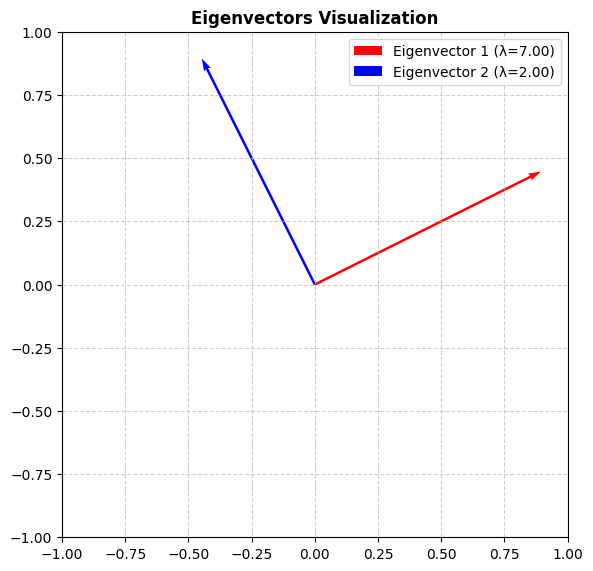

In [21]:
# Eigenvector Visualization
fig_eigen = plot_eigenvectors(A_eigen, eigen_result["eigenvalues"], eigen_result["eigenvectors"])
save_and_show_plot(fig_eigen, EXPORT_PLOTS / "step7_eigenvectors.png")

## 🔹 Step 8: Singular Value Bar Plot

/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/utils/viz_utils.py:698: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, len(singular_values)+1)),


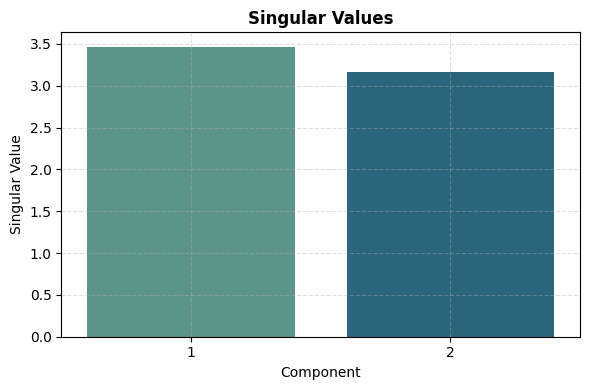

In [22]:
# Singular Value Bar Plot
fig_svd = plot_singular_values(svd_result["S"])
save_and_show_plot(fig_svd, EXPORT_PLOTS / "step8_singular_values.png")

## 🧠 Key Takeaways
- Eigen decomposition is useful for covariance and PCA analysis.
- SVD is powerful for dimensionality reduction and data compression.
- Least squares lets us solve overdetermined systems — core to linear regression.
- Matrix inversion and diagnostics are essential for numerical stability and interpretation.

## ✅ Summary
In this notebook, we:

- Computed eigenvalues and eigenvectors for symmetric matrices
- Decomposed matrices using SVD (U, S, Vᵀ)
- Solved least squares problems using `np.linalg.lstsq`
- Reviewed matrix properties like rank, determinant, and inverse